#### Tool calling allows a chat model to respond to a given prompt by "calling a tool". The model only generates the arguments to a tool, and actually running the tool (or not) is up to the user. 

In [1]:
from IPython.display import Image

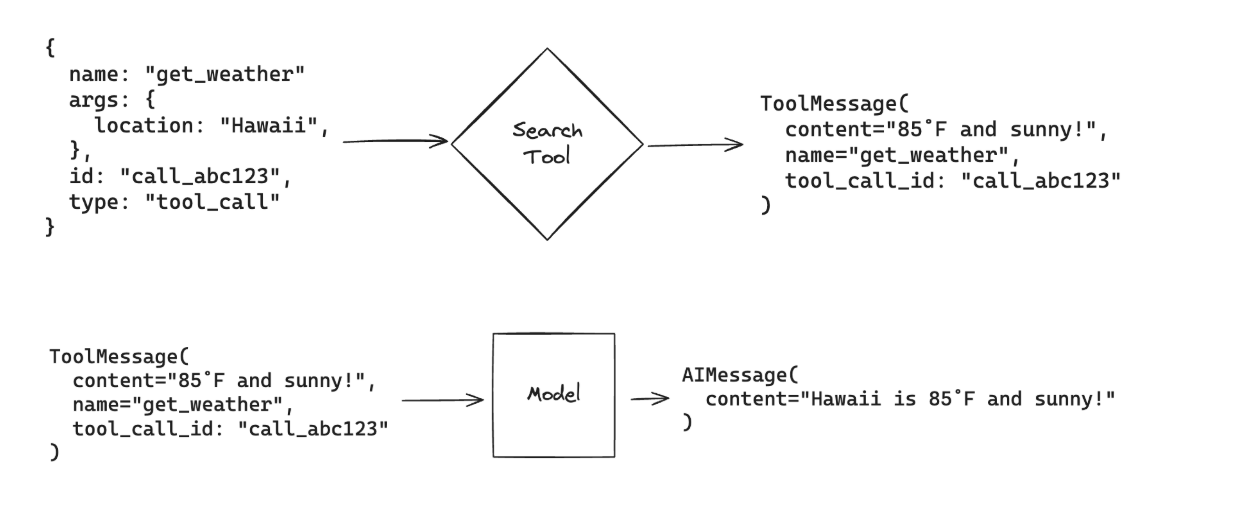

In [2]:
Image("tool.png")

In [3]:
import getpass
import os
from langchain_core.tools import tool
from langchain.chat_models import init_chat_model

In [4]:
if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

Enter API key for Groq:  ········


In [5]:
llm = init_chat_model("llama3-8b-8192", model_provider="groq")

In [6]:
@tool
def add(a: int, b: int) -> int:
    """Adds a and b."""
    return a + b


@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b."""
    return a * b

In [7]:
tools = [add, multiply]
llm_with_tools = llm.bind_tools(tools)

In [8]:
from langchain_core.messages import HumanMessage
query = "What is 3 * 12? Also, what is 11 + 49?"
messages = [HumanMessage(query)]
messages

[HumanMessage(content='What is 3 * 12? Also, what is 11 + 49?', additional_kwargs={}, response_metadata={})]

In [9]:
ai_msg = llm_with_tools.invoke(messages)
print(ai_msg.tool_calls)

[{'name': 'multiply', 'args': {'a': 3, 'b': 12}, 'id': 'call_kj6p', 'type': 'tool_call'}, {'name': 'add', 'args': {'a': 11, 'b': 49}, 'id': 'call_8eb3', 'type': 'tool_call'}]


#### What is a Tool Call?
A Tool Call is a structured object generated by the LLM that tells you:

Which tool to call (e.g., multiply)

What arguments to pass (e.g., a=3, b=12)

An identifier for tracking (e.g., call_1fyhJAbJ...)

In [10]:
messages.append(ai_msg)

In [11]:
for tool_call in ai_msg.tool_calls:
    selected_tool = {"add": add, "multiply": multiply}[tool_call["name"].lower()]
    tool_msg = selected_tool.invoke(tool_call)
    messages.append(tool_msg)

messages

[HumanMessage(content='What is 3 * 12? Also, what is 11 + 49?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kj6p', 'function': {'arguments': '{"a":3,"b":12}', 'name': 'multiply'}, 'type': 'function'}, {'id': 'call_8eb3', 'function': {'arguments': '{"a":11,"b":49}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 128, 'prompt_tokens': 2111, 'total_tokens': 2239, 'completion_time': 0.106666667, 'prompt_time': 0.26384806, 'queue_time': -0.5796517999999999, 'total_time': 0.370514727}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f740af26-422b-47d4-8eb2-efcc7d1e8be0-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 12}, 'id': 'call_kj6p', 'type': 'tool_call'}, {'name': 'add', 'args': {'a': 11, 'b': 49}, 'id': 'call_8eb3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2111, '

In [12]:
llm_with_tools.invoke(messages)

AIMessage(content='36 * 12 is 432. 11 + 49 is 60. The answer to your original question is: The product of 3 * 12 is 432 and the sum of 11 + 49 is 60.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 1173, 'total_tokens': 1223, 'completion_time': 0.041666667, 'prompt_time': 0.146613459, 'queue_time': 0.24994486, 'total_time': 0.188280126}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-0ce9cb4b-abdb-4e62-8ee1-fc1d51f50128-0', usage_metadata={'input_tokens': 1173, 'output_tokens': 50, 'total_tokens': 1223})